<a href="https://colab.research.google.com/github/KrzysztofDrobnik/PUM_Ptojekt_2025/blob/main/Project_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [117]:
#import potrzebnych bilbiotek
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [118]:
#wczytanie pliku z danymi
df = pd.read_csv('taxi_trip_pricing (1).csv')

In [119]:
#podstawowe miary statystyczne
df.describe()

,Trip_Distance_km,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
count,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,951.000000
mean,27.070547,2.476842,3.502989,1.233316,0.292916,62.118116,56.874773
std,19.905300,1.102249,0.870162,0.429816,0.115592,32.154406,40.469791
min,1.230000,1.000000,2.010000,0.500000,0.100000,5.010000,6.126900
25%,12.632500,1.250000,2.730000,0.860000,0.190000,35.882500,33.742650
50%,25.830000,2.000000,3.520000,1.220000,0.290000,61.860000,50.074500
75%,38.405000,3.000000,4.260000,1.610000,0.390000,89.055000,69.099350
max,146.067047,4.000000,5.000000,2.000000,0.500000,119.840000,332.043689


In [120]:
#sprawdzenie podstawowych danych o df
wiersze, kolumny = df.shape
print("Liczba wierszy:", wiersze)
print("Liczba kolumn:", kolumny)

df.info()

Liczba wierszy: 1000
Liczba kolumn: 11
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       950 non-null    float64
 1   Time_of_Day            950 non-null    object 
 2   Day_of_Week            950 non-null    object 
 3   Passenger_Count        950 non-null    float64
 4   Traffic_Conditions     950 non-null    object 
 5   Weather                950 non-null    object 
 6   Base_Fare              950 non-null    float64
 7   Per_Km_Rate            950 non-null    float64
 8   Per_Minute_Rate        950 non-null    float64
 9   Trip_Duration_Minutes  950 non-null    float64
 10  Trip_Price             951 non-null    float64
dtypes: float64(7), object(4)
memory usage: 86.1+ KB


In [121]:
#usunięcie dupilkatów danych
df = df.drop_duplicates()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       950 non-null    float64
 1   Time_of_Day            950 non-null    object 
 2   Day_of_Week            950 non-null    object 
 3   Passenger_Count        950 non-null    float64
 4   Traffic_Conditions     950 non-null    object 
 5   Weather                950 non-null    object 
 6   Base_Fare              950 non-null    float64
 7   Per_Km_Rate            950 non-null    float64
 8   Per_Minute_Rate        950 non-null    float64
 9   Trip_Duration_Minutes  950 non-null    float64
 10  Trip_Price             951 non-null    float64
dtypes: float64(7), object(4)
memory usage: 86.1+ KB


In [122]:
#połaczenie zmiennych "Per_Minute_Rate" oraz "Trip_Duration_Minutes" w jedną zmienną będącą ich iloczynem
df["Time_Cost"] = df["Per_Minute_Rate"] * df["Trip_Duration_Minutes"]
df.drop(columns=["Per_Minute_Rate", "Trip_Duration_Minutes"], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Trip_Distance_km    950 non-null    float64
 1   Time_of_Day         950 non-null    object 
 2   Day_of_Week         950 non-null    object 
 3   Passenger_Count     950 non-null    float64
 4   Traffic_Conditions  950 non-null    object 
 5   Weather             950 non-null    object 
 6   Base_Fare           950 non-null    float64
 7   Per_Km_Rate         950 non-null    float64
 8   Trip_Price          951 non-null    float64
 9   Time_Cost           902 non-null    float64
dtypes: float64(6), object(4)
memory usage: 78.3+ KB


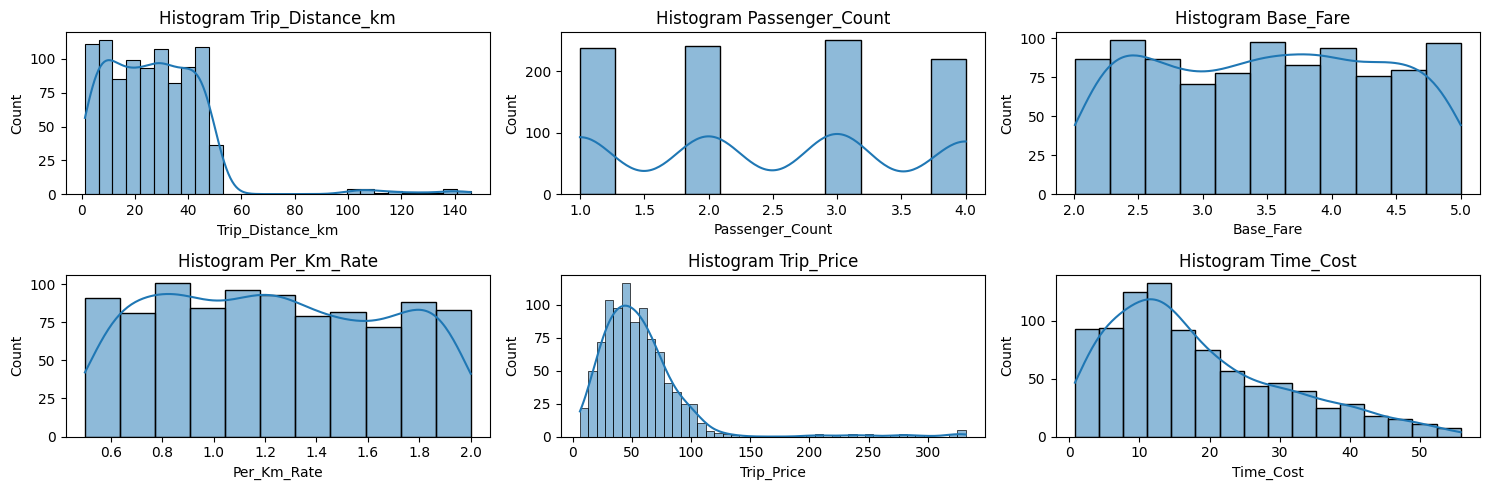

In [123]:
#sprawdzanie rozkładów zmiennych w celu stwierdzenie czy lepiej zastąpić wartości puste średnią czy medianą (lub ewentualnie inną statystyką)
fig, axes = plt.subplots(2, 3, figsize=(15, 5))

sns.histplot(df['Trip_Distance_km'], ax=axes[0, 0], kde=True)
axes[0, 0].set_title('Histogram Trip_Distance_km')

sns.histplot(df['Passenger_Count'], ax=axes[0, 1], kde=True)
axes[0, 1].set_title('Histogram Passenger_Count')

sns.histplot(df['Base_Fare'], ax=axes[0, 2], kde=True)
axes[0, 2].set_title('Histogram Base_Fare  ')

sns.histplot(df['Per_Km_Rate'], ax=axes[1, 0], kde=True)
axes[1, 0].set_title('Histogram Per_Km_Rate')

sns.histplot(df['Trip_Price'], ax=axes[1, 1], kde=True)
axes[1, 1].set_title('Histogram Trip_Price')

sns.histplot(df['Time_Cost'], ax=axes[1, 2], kde=True)
axes[1, 2].set_title('Histogram Time_Cost')

plt.tight_layout()
plt.show()

In [124]:
#rozkład zmiennej Trip_Distance_km - skośny prawostronnie - najlepiej zastąpić wartości puste medianą
#rozkład zmiennej Passenger_Count - zmienna dyskretna, przyjmowane wartości z kilku możliwych opcji - najlepiej zastąpić wartości puste modą
#rozkład zmiennej Base_Fare - bez silnych skośności - najlepiej zastąpić wartości puste średnią
#rozkład zmiennej Per_Km_Rate - bez silnych skośności - najlepiej zastąpić wartości puste średnią
#rozkład zmiennej Trip_Price - skośny prawostronnie - najlepiej zastąpić wartości puste medianą
#rozkłąd zmiennej Time_Cost - skośnt prawostronnie - najlepiej zastąpić wartości puste medianą

trip_distance_median = df['Trip_Distance_km'].median()
passenger_count_mode = df['Passenger_Count'].mode()[0]
base_fare_mean = df['Base_Fare'].mean()
per_km_rate_mean = df['Per_Km_Rate'].mean()
trip_price_median = df['Trip_Price'].median()
time_cost_median = df['Time_Cost'].median()

df['Trip_Distance_km'] = df['Trip_Distance_km'].fillna(trip_distance_median)
df['Passenger_Count'] = df['Passenger_Count'].fillna(passenger_count_mode)
df['Base_Fare'] = df['Base_Fare'].fillna(base_fare_mean)
df['Per_Km_Rate'] = df['Per_Km_Rate'].fillna(per_km_rate_mean)
df['Trip_Price'] = df['Trip_Price'].fillna(trip_price_median)
df['Time_Cost'] = df['Time_Cost'].fillna(time_cost_median)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Trip_Distance_km    1000 non-null   float64
 1   Time_of_Day         950 non-null    object 
 2   Day_of_Week         950 non-null    object 
 3   Passenger_Count     1000 non-null   float64
 4   Traffic_Conditions  950 non-null    object 
 5   Weather             950 non-null    object 
 6   Base_Fare           1000 non-null   float64
 7   Per_Km_Rate         1000 non-null   float64
 8   Trip_Price          1000 non-null   float64
 9   Time_Cost           1000 non-null   float64
dtypes: float64(6), object(4)
memory usage: 78.3+ KB


In [125]:
#zaokrąglenie wartości w kolumnach do 2 miejsc po przecinku (w tych kolumnach dużo wartości z bardzo długim rozwinięciem dziesiętnym)
df[['Trip_Distance_km', 'Trip_Price', 'Time_Cost']] = df[['Trip_Distance_km', 'Trip_Price', 'Time_Cost']].round(2)

In [126]:
#sprawdzenie wartości dla zmiennych tekstowych
text_columns = ['Time_of_Day', 'Day_of_Week', 'Traffic_Conditions', 'Weather']

for column in text_columns:
    print(df[column].value_counts())
    print("\n")

Time_of_Day
Afternoon    371
Morning      283
Evening      203
Night         93
Name: count, dtype: int64


Day_of_Week
Weekday    655
Weekend    295
Name: count, dtype: int64


Traffic_Conditions
Low       397
Medium    371
High      182
Name: count, dtype: int64


Weather
Clear    667
Rain     227
Snow      56
Name: count, dtype: int64




In [127]:
#sprawdzenie jaki procent danych stanowią brakujące dane
braki_procent = df.isnull().sum() / len(df) * 100
braki_procent = braki_procent[braki_procent > 0]
print(braki_procent)


Time_of_Day           5.0
Day_of_Week           5.0
Traffic_Conditions    5.0
Weather               5.0
dtype: float64


In [128]:
#Wartości puste stanowią 5% obserwacji, przy dosyć małej próbie (1000 obserwacji) usunięcie wszsytkich wartości pustych może zaburzyć model
#zastępujemy wartości puste modą

text_columns_to_transform = ['Time_of_Day', 'Day_of_Week', 'Traffic_Conditions', 'Weather']

for col in text_columns_to_transform:
    df[col] = df[col].fillna(df[col].mode()[0])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Trip_Distance_km    1000 non-null   float64
 1   Time_of_Day         1000 non-null   object 
 2   Day_of_Week         1000 non-null   object 
 3   Passenger_Count     1000 non-null   float64
 4   Traffic_Conditions  1000 non-null   object 
 5   Weather             1000 non-null   object 
 6   Base_Fare           1000 non-null   float64
 7   Per_Km_Rate         1000 non-null   float64
 8   Trip_Price          1000 non-null   float64
 9   Time_Cost           1000 non-null   float64
dtypes: float64(6), object(4)
memory usage: 78.3+ KB


In [129]:
#zmienne tekstowe na zmienne numeryczne
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = le.fit_transform(df[column])

print(df.head())

   Trip_Distance_km  Time_of_Day  Day_of_Week  Passenger_Count  \
0             19.35            2            0              3.0   
1             47.59            0            0              1.0   
2             36.87            1            1              1.0   
3             30.33            1            0              4.0   
4             25.83            1            0              3.0   

   Traffic_Conditions  Weather  Base_Fare  Per_Km_Rate  Trip_Price  Time_Cost  
0                   1        0   3.560000         0.80       36.26      17.22  
1                   0        0   3.502989         0.62       50.07      17.45  
2                   0        0   2.700000         1.21       52.90       5.59  
3                   1        0   3.480000         0.51       36.47      17.52  
4                   0        0   2.930000         0.63       15.62       7.24  


In [130]:
#IQR -  tak jak bylo na zajeciach - usuwanie outlierów

Q1 = df.quantile(q=0.25)
Q3 = df.quantile(q=0.75)
IQR = Q3 - Q1

df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [131]:
df.info()
#usunięcie 60 wartości odstających - akceptowalne

<class 'pandas.core.frame.DataFrame'>
Index: 940 entries, 0 to 999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Trip_Distance_km    940 non-null    float64
 1   Time_of_Day         940 non-null    int64  
 2   Day_of_Week         940 non-null    int64  
 3   Passenger_Count     940 non-null    float64
 4   Traffic_Conditions  940 non-null    int64  
 5   Weather             940 non-null    int64  
 6   Base_Fare           940 non-null    float64
 7   Per_Km_Rate         940 non-null    float64
 8   Trip_Price          940 non-null    float64
 9   Time_Cost           940 non-null    float64
dtypes: float64(6), int64(4)
memory usage: 80.8 KB


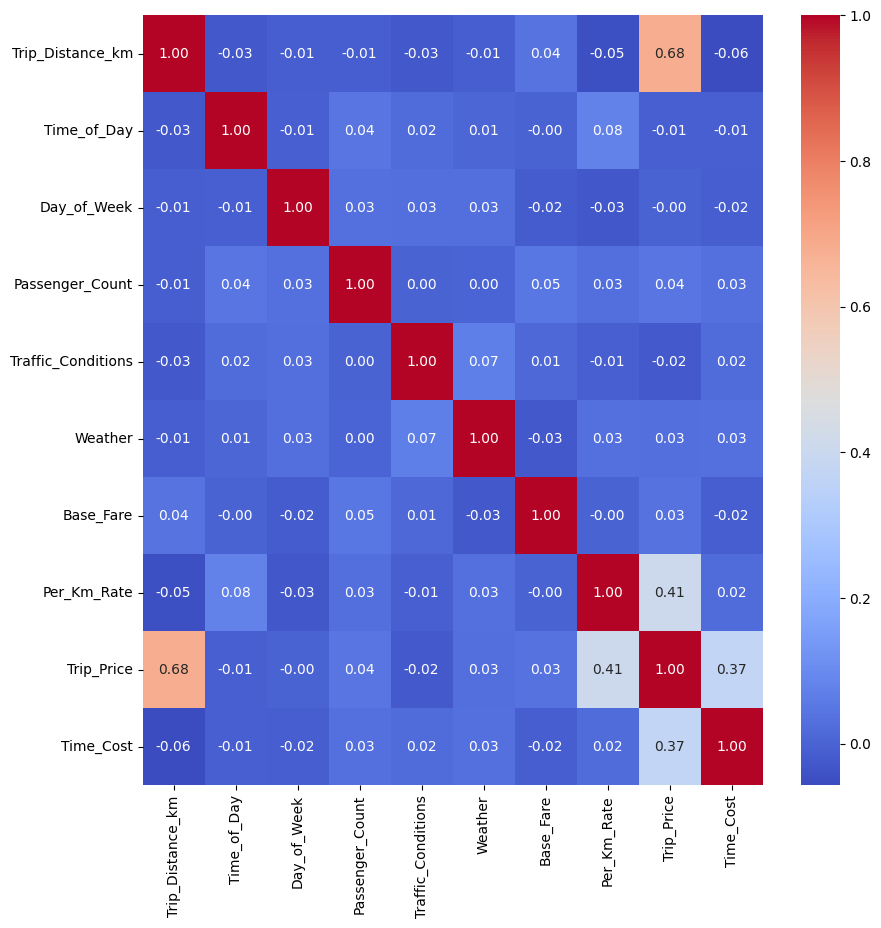

In [132]:
# Korelacja

corr = df.corr()

plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()


#WAŻNE - zmienna celu to Trip_price, więc korelacja z nia moze byc

In [133]:
#VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

y = df['Trip_Price']
X = df.drop(columns=['Trip_Price'])

vif_data = pd.DataFrame()
vif_data["variables"] = X.columns
vif_data["VIF"] = [vif(X.values, i) for i in range(X.shape[1])]
print(vif_data)

#BASE FARE DO USUNIĘCIA - BASE_FARE VIF > 10. PER_KM_RATE > 7 - też do usunięcia.
#Reszta to mała współliniowosć, wiec powinno być dobrze po usunięciu tych dwóch elementów

            variables        VIF
0    Trip_Distance_km   3.840006
1         Time_of_Day   2.013246
2         Day_of_Week   1.412971
3     Passenger_Count   5.851137
4  Traffic_Conditions   3.591028
5             Weather   1.346923
6           Base_Fare  11.206672
7         Per_Km_Rate   7.764282
8           Time_Cost   3.374550


In [134]:
df.drop(
    columns = [ 'Base_Fare', 'Per_Km_Rate'],
    inplace = True,
)



In [135]:
y = df['Trip_Price']
X = df.drop(columns=['Trip_Price'])

vif_data = pd.DataFrame()
vif_data["variables"] = X.columns
vif_data["VIF"] = [vif(X.values, i) for i in range(X.shape[1])]
print(vif_data)

#teraz okej

            variables       VIF
0    Trip_Distance_km  3.220224
1         Time_of_Day  1.919074
2         Day_of_Week  1.401283
3     Passenger_Count  4.512657
4  Traffic_Conditions  3.222832
5             Weather  1.336229
6           Time_Cost  3.041447


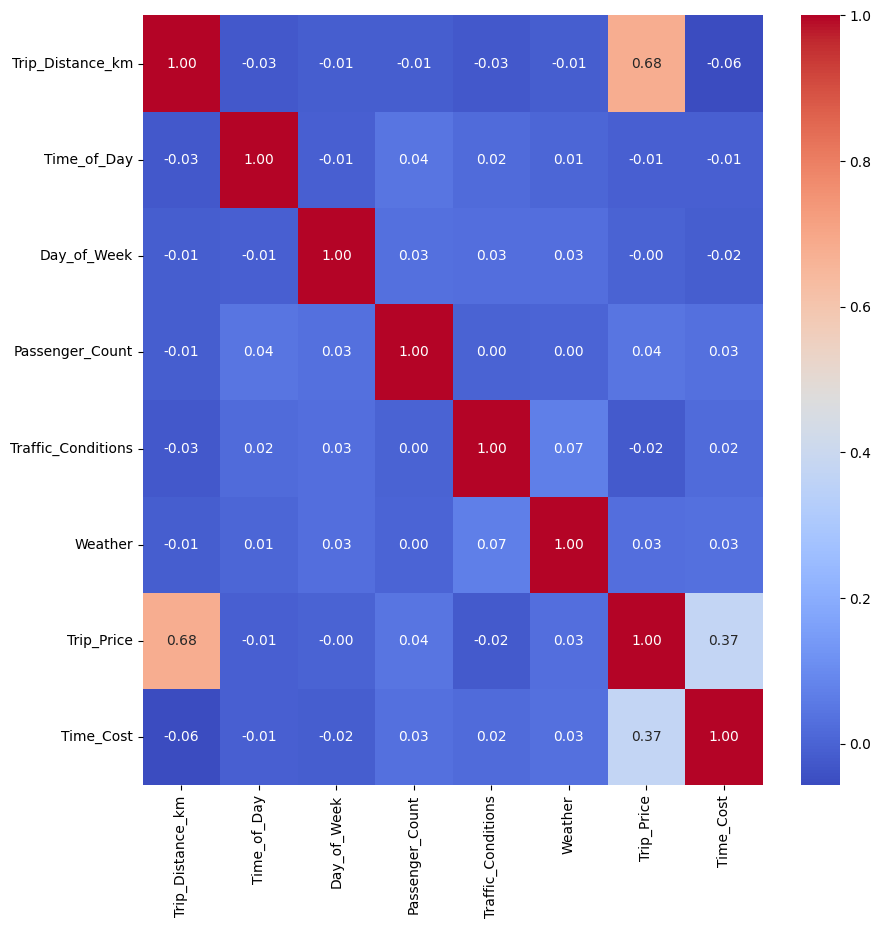

In [136]:
# Korelacja - próba 2


corr = df.corr()

plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()




In [137]:
df.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Trip_Price,Time_Cost
0,19.35,2,0,3.0,1,0,36.26,17.22
1,47.59,0,0,1.0,0,0,50.07,17.45
2,36.87,1,1,1.0,0,0,52.90,5.59
3,30.33,1,0,4.0,1,0,36.47,17.52
4,25.83,1,0,3.0,0,0,15.62,7.24


In [138]:
#standaryzacja

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_scaled  = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)


df_scaled.head()


,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Trip_Price,Time_Cost
0,-0.405674,0.922865,-0.652996,0.459179,-0.276559,-0.584619,-0.642754,0.064193
1,1.613665,-1.011345,-0.652996,-1.397286,-1.674224,-0.584619,-0.022514,0.086531
2,0.847117,-0.044240,1.531403,-1.397286,-1.674224,-0.584619,0.104589,-1.065358
3,0.379466,-0.044240,-0.652996,1.387412,-0.276559,-0.584619,-0.633322,0.093330
4,0.057687,-0.044240,-0.652996,0.459179,-1.674224,-0.584619,-1.569745,-0.905104


# Część 2 - Model podstawowy jako wybrany benchmark, wybranie metod oceny modelu, wyznaczenie danych uczących i testowych





Wybrany model - model liniowy (regresja liniowa)

In [105]:
from sklearn.model_selection import train_test_split
#wyznaczenie zmiennej objaśnianej i zmiennych objaśniających
X = df_scaled.drop(columns=['Trip_Price'])
y = df_scaled['Trip_Price']

#podział danych na dane testowe i dane treningowe w stosunku 20:80
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [140]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, root_mean_squared_error

#trenowanie modelu na danych
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

coef = linear_reg.coef_
intercept = linear_reg.intercept_

trip_distance_km = round(coef[0], 2)
time_of_day = round(coef[1], 2)
day_of_week = round(coef[2], 2)
passenger_count = round(coef[3], 2)
traffic_conditions = round(coef[4], 2)
weather = round(coef[5], 2)
time_cost = round(coef[6], 2)

intercept = round(intercept, 2)

print("Model regresji liniowej:")
print(f"Y = {trip_distance_km}*Trip_Distance_km + {time_of_day}*Time_of_Day + {day_of_week}*Day_of_Week + {passenger_count}*Passenger_Count + {traffic_conditions}*Traffic_Conditions + {weather}*Weather + {time_cost}*Time_Cost + {intercept}")

Model regresji liniowej:
Y = 0.71*Trip_Distance_km + 0.01*Time_of_Day + 0.01*Day_of_Week + 0.03*Passenger_Count + -0.01*Traffic_Conditions + 0.02*Weather + 0.4*Time_Cost + 0.0


In [107]:
#ocena modelu regresji liniowej

y_pred = linear_reg.predict(X_test)

mse = round(mean_squared_error(y_test, y_pred), 1)
mae = round(mean_absolute_error(y_test, y_pred), 1)
rmse = round(root_mean_squared_error(y_test, y_pred), 1)
r2 = round(r2_score(y_test, y_pred), 3)

print(f"MSE: {mse}\nMAE = {mae}\nRMSE = {rmse}\nR2 = {r2}")

MSE: 0.3
MAE = 0.4
RMSE = 0.6
R2 = 0.676


<h5>Interpretacja wyników:</h5>
<h5>Wartość R2 wynosi ok. 68%, co oznacza, że wybrane zmienne objaśniające w 68% wyjaśniają ceny przejazdów taksówkami.
Oznacza to, że zmienna Y w 32% zależy od innych, nieuwzględnionych w modelu czynników - wynik do poprawy</h5>

<h5>interpretacja pozostałych wskaźników problematyczna ze względu na przeskalowanie danych:</h5>

 Średni błąd bezwględny modelu ma wartość 0.4 jednostek, a więc przewidywane ceny przejazdu taksówką różnią się od wartości rzeczywistych o ok. 0.4 jednostek
Wartość RMSE wynosi 0.6 jednostek, a więc przewidywane ceny przejazdu taksówką różnią się od wartości rzeczywistych o +/- 0.6 jednostek
natomiast są to przeskalowane dane - powyższa interpretacja wartości MAE oraz RMSE nie ma większego sensu

In [116]:
#interpretacja takich wskażników jak MAE czy RMSE ma sens przy nieprzeskalownych danych
X_notscaled = df.drop('Trip_Price', axis = 1)
y_notscaled = df['Trip_Price']

X_train1, X_test1, y_train1, y_test1 = train_test_split(X_notscaled, y_notscaled, test_size=0.2)

linear_regression = LinearRegression()
linear_regression.fit(X_train1, y_train1)

coef = linear_regression.coef_
intercept = linear_regression.intercept_

trip_distance_km = round(coef[0], 2)
time_of_day = round(coef[1], 2)
day_of_week = round(coef[2], 2)
passenger_count = round(coef[3], 2)
traffic_conditions = round(coef[4], 2)
weather = round(coef[5], 2)
time_cost = round(coef[6], 2)

intercept = round(intercept, 2)

print("Model regresji liniowej:")
print(f"Y = {trip_distance_km}*Trip_Distance_km + {time_of_day}*Time_of_Day + {day_of_week}*Day_of_Week + {passenger_count}*Passenger_Count + {traffic_conditions}*Traffic_Conditions + {weather}*Weather + {time_cost}*Time_Cost + {intercept}")


y_pred1 = linear_regression.predict(X_test1)

mse_notscaled = round(mean_squared_error(y_test1, y_pred1), 1)
mae_notscaled = round(mean_absolute_error(y_test1, y_pred1), 1)
rmse_notscaled = round(root_mean_squared_error(y_test1, y_pred1), 1)
r2_notscaled = round(r2_score(y_test1, y_pred1), 3)

print(f"MSE: {mse_notscaled}\nMAE = {mae_notscaled}\nRMSE = {rmse_notscaled}\nR2 = {r2_notscaled}")

trip_price_mean = round(y_test1.mean(), 2)
mae_to_mean = round(mae_notscaled/trip_price_mean, 2) * 100
rmse_to_mean = round(rmse_notscaled/trip_price_mean, 2) * 100

print(f"Średnia wartość Trip_Price: {trip_price_mean}")
print(f"MAE/Średnia wartość y: {mae_to_mean}%")
print(f"RMSE/Średnia wartość y: {rmse_to_mean}%")

Model regresji liniowej:
Y = 1.1*Trip_Distance_km + 0.29*Time_of_Day + 0.41*Day_of_Week + 0.41*Passenger_Count + -0.23*Traffic_Conditions + 1.43*Weather + 0.89*Time_Cost + 6.56
MSE: 163.9
MAE = 10.0
RMSE = 12.8
R2 = 0.677
Średnia wartość Trip_Price: 50.51
MAE/Średnia wartość y: 20.0%
RMSE/Średnia wartość y: 25.0%


# Interpretacja wyników

- **Średni błąd bezwzględny modelu** ma wartość **10.0 USD**, co oznacza, że przewidywane ceny przejazdu taksówką różnią się od wartości rzeczywistych o około **10.0 USD**.
- **Średnia pomyłka modelu względem średniej wartości** wynosi **20%**, co można uznać za wynik średni/umiarkowany.
- **Wartość RMSE** wynosi **12.8 USD**, co oznacza, że przewidywane ceny przejazdu taksówką różnią się od wartości rzeczywistych o około **+/- 12.8 USD**.
- **Stosunek RMSE do średniej** wynosi **25%**, co wskazuje, że wybrane przewidywania mogą się odchylać o nawet **25%**.
- **Wartość R²** wynosi około **68%**, co oznacza, że wybrane zmienne objaśniające w **68%** wyjaśniają ceny przejazdów taksówkami.
- Oznacza to, że zmienna **Y** w **32%** zależy od innych, nieuwzględnionych w modelu czynników – wynik wymaga poprawy.

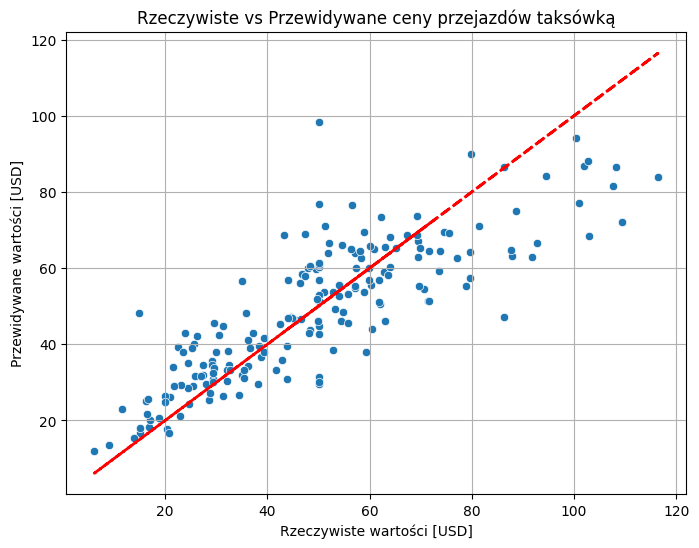

In [46]:
#wizualizacja danych
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Wykres 1: Rzeczywiste vs Przewidywane
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test1, y=y_pred1)
plt.plot(y_test1, y_test1, 'r--', lw=2)
plt.xlabel("Rzeczywiste wartości [USD]")
plt.ylabel("Przewidywane wartości [USD]")
plt.title("Rzeczywiste vs Przewidywane ceny przejazdów taksówką")
plt.grid(True)
plt.show()



# interpretacja wykresu:
- większość punktów leży blisko linii (R2 = 68%), jednak pewna część punktów nie układa się wzdłuż lini (∅2 = 1-R2 = 32%)
- niskie ceny przejazdów taksówką są trochę zawyżone - większość punktów leży nad linią y=x
- wysokie ceny przejazdów są z kolei zaniżone - większość punktów leży pod linią y = x

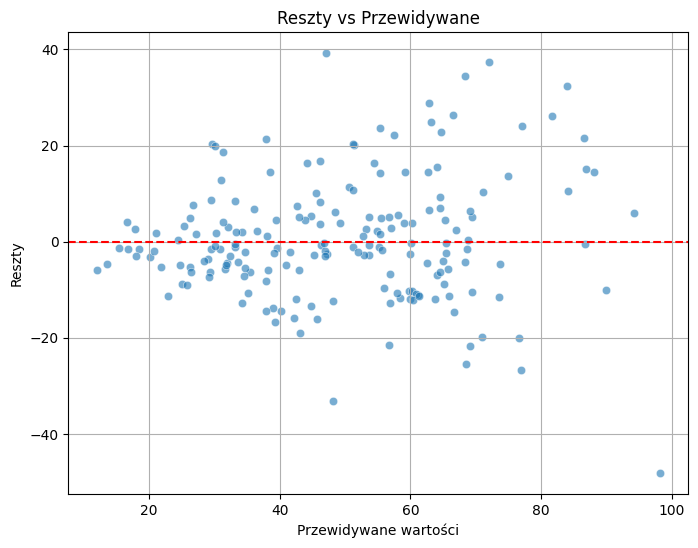

In [47]:
#wykres2 - reszty i wartości przewidziane
plt.figure(figsize=(8, 6))
residuals = y_test1 - y_pred1
sns.scatterplot(x=y_pred1, y=residuals, alpha=0.6)
plt.axhline(0, color = 'red', linestyle='--')
plt.xlabel("Przewidywane wartości")
plt.ylabel("Reszty")
plt.title("Reszty vs Przewidywane")
plt.grid(True)
plt.show()


# interpretacja wykresu:
- model nie przejawia wyraźnego wzorca - model w miarę dobrze oddał ogólny trend
- punkty są dosyć równomiernie rozrzucone wokół poziomej lini - model jest raczej nieobciążony
- im większe wartości tym większy rorzut punktów - heteroskedastyczność - im większa wartość przewidywana tym większe błędy

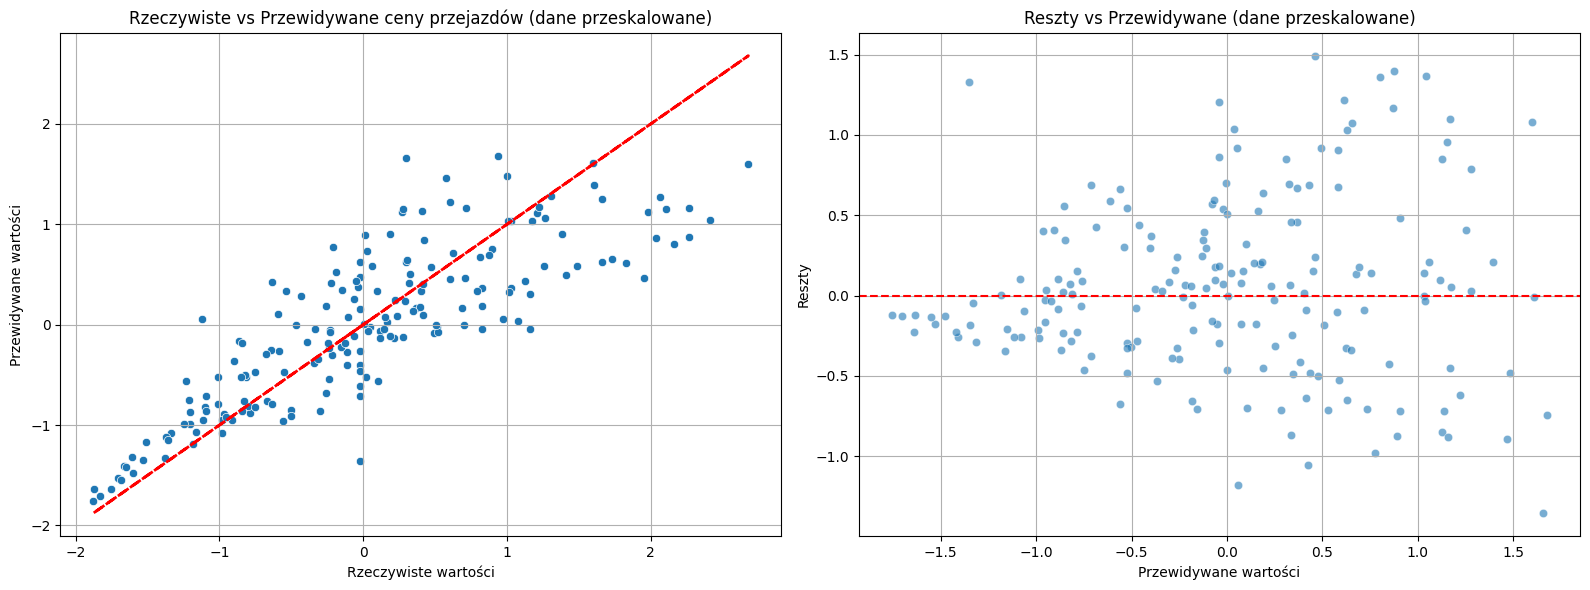

In [48]:
#dodatkowa wizualizacja dla danych przeskalowanych - bardzo podobne wnioski
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Wykres 1: Rzeczywiste vs Przewidywane - dane przeskalowane
sns.scatterplot(x=y_test, y=y_pred, ax=axes[0])
axes[0].plot(y_test, y_test, 'r--', lw=2)
axes[0].set_xlabel("Rzeczywiste wartości")
axes[0].set_ylabel("Przewidywane wartości")
axes[0].set_title("Rzeczywiste vs Przewidywane ceny przejazdów (dane przeskalowane)")
axes[0].grid(True)

# Wykres 2: Reszty vs Przewidywane - dane przeskalowane
residuals = y_test - y_pred
sns.scatterplot(x=y_pred, y=residuals, alpha=0.6, ax=axes[1])
axes[1].axhline(0, color='red', linestyle='--')
axes[1].set_xlabel("Przewidywane wartości")
axes[1].set_ylabel("Reszty")
axes[1].set_title("Reszty vs Przewidywane (dane przeskalowane)")
axes[1].grid(True)

# Wyświetlenie obu wykresów
plt.tight_layout()
plt.show()

# **Część 3 - Dwa dodatkowe modele do porównania**

# 1 Model - Regresja Lasso - Least Absolute Shrinkage and Selection Operator


W budowaniu tego modelu zastosowano GridSearchCV w celu automatycznego przeszukania najlepszych hiperparametrów za pomocą siatki możliwych kombinacji. Pozwoli to na znalezienie optymalnej wartości hiperparametru Alfa - czyli kluczowego hiperparametru kontrolującego siłę regularyzacji

In [54]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

# definicja modelu
lasso = Lasso(max_iter=10000)

# Siatka parametrów - im mniejsze wartośći tym regularyzacja jest mniejsza, a więc większość cech zostaje
# Im większe wartości, tym "kara" jest silniejsza
parametry = {
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
}

# GridSearch z 5-krotną walidacją - dane dzielone są na 5 części - model każdorazowo używa 4 części do trenowania, 1 części do testowania
# GridSerch maksymalizuje wynik scoringu, dlatego konieczne jest użyciu ujemnego MSE
grid = GridSearchCV(estimator=lasso, param_grid=parametry, cv=5, scoring='neg_mean_squared_error')
grid.fit(X_train, y_train)

# Wybór najlepszego modelu
best_lasso = grid.best_estimator_

# Predykcja
y_pred_lasso= best_lasso.predict(X_test)

# Ocena modelu
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("Najlepsze alpha:", grid.best_params_)
print("RMSE:", rmse_lasso)
print("MAE:", mae_lasso)
print("MSE:", mse_lasso)
print("R²:", r2_lasso)



Najlepsze alpha: {'alpha': 0.001}
RMSE: 0.6318880651560124
MAE: 0.49138082400295596
MSE: 0.39928252688660887
R²: 0.6353132117678888


# **Interpretacja wyników:**
- wartość optymalnego hiperparametru Alfa jest dosyć mała. Oznacza to, że model wymaga jedynie delikatnej regularyzacji - większość cech (zmiennych) w modelu jest ważna i nie powinna zostać usunięta
- Wartość współczynnika R2 wynosi ok. 64%. Oznacza to, że zmienne uwzględnione w modelu w 64% wyjaśniają wariancję zmiennej Y - wynik średni
- interpretacja pozostałych wskażników utrudniona ze względu na przeskalowanie danych, natomiast zostaną one wykorzystane do porównania modeli

In [56]:
#sprawdzenie, które ze współczynników mają wartość 0
coefficients = best_lasso.coef_
feature_names = X_train.columns

coef_df = pd.DataFrame({
    'Cecha': feature_names,
    'Współczynnik': coefficients
})

coef_df

,Cecha,Współczynnik
0,Trip_Distance_km,0.692289
1,Time_of_Day,0.021428
2,Day_of_Week,0.023233
3,Passenger_Count,0.050407
4,Traffic_Conditions,-0.024712
5,Weather,0.015990
6,Time_Cost,0.408646


**Regresja Lasso nie wyzerowała żadnego współczynnika - oznacza to że współczynniki przy wszystkich zmiennych są istotne dla dokonania preydkcji**

Wizualizacja wpływu hiperparametru alfa na współczynniki zmiennych w modelu

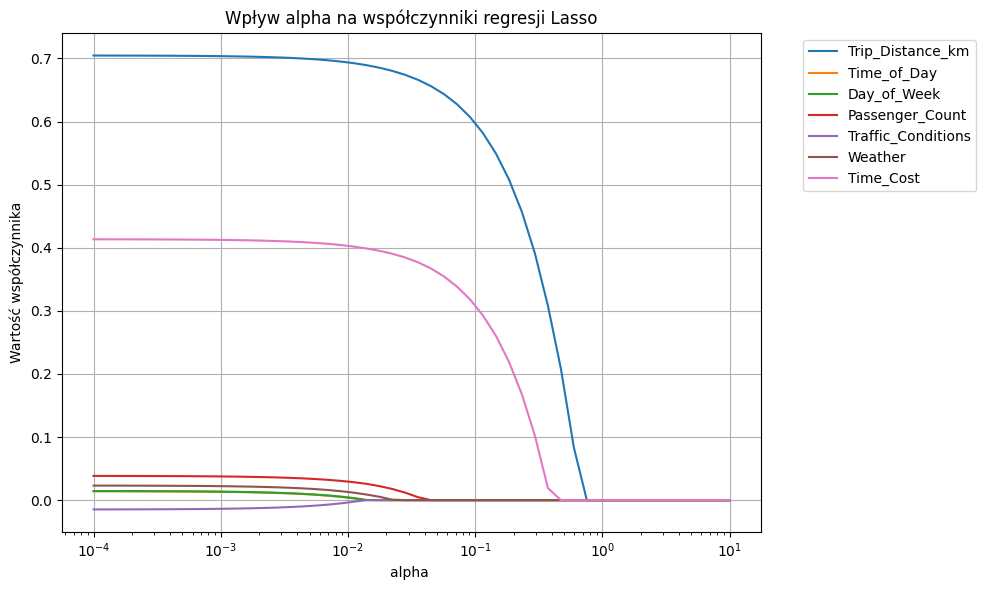

In [57]:
X_visualization = df_scaled.drop('Trip_Price', axis=1).values
y_visualization = df_scaled['Trip_Price'].values
feature_names = df_scaled.drop('Trip_Price', axis=1).columns

# 50 wartości alpha
alphas = np.logspace(-4, 1, 50)
coefs = []
for a in alphas:
    lasso = Lasso(alpha=a, max_iter=10000)
    lasso.fit(X_visualization, y_visualization)
    coefs.append(lasso.coef_)

plt.figure(figsize=(10, 6))
plt.gca().set_xscale('log')

for i in range(len(feature_names)):
    plt.plot(alphas, [coef[i] for coef in coefs], label=feature_names[i])

plt.xlabel('alpha ')
plt.ylabel('Wartość współczynnika')
plt.title('Wpływ alpha na współczynniki regresji Lasso')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# **Intepretacja:**
- zmienne Trip_Distance_km oraz Time_Cost wydają się być najbardziej odporne na regularyzacje - wartości współczynników przy tych zmiennych zanikają dopiero przy znacznym wzroście Alfa
- pozostałe zmienne szybko przestają mieć wpływ wraz ze wzrostem hiperparametru Alfa

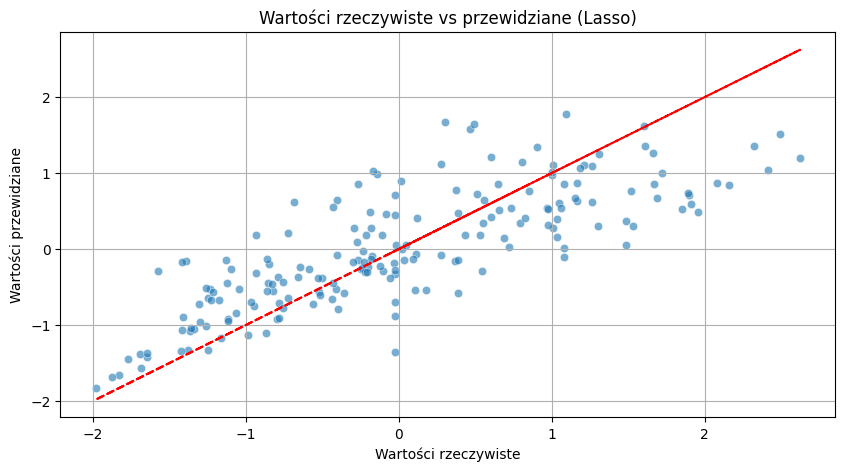

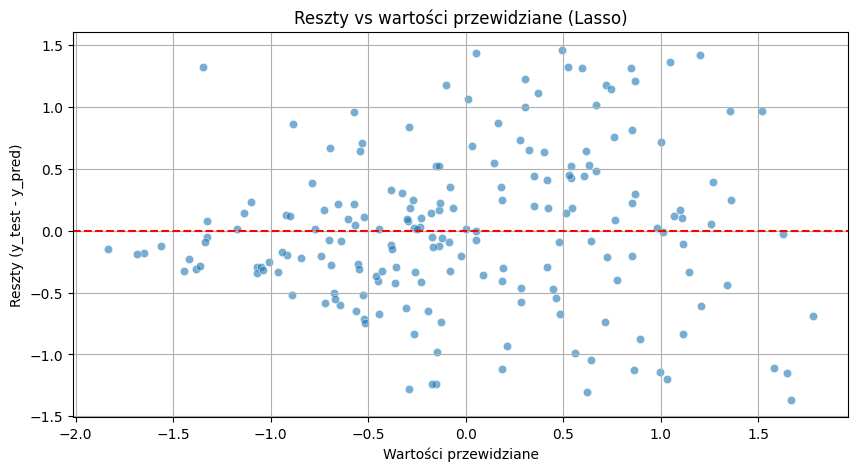

In [58]:
# 1. Wartości rzeczywiste vs przewidziane
plt.figure(figsize=(10, 5))
sns.scatterplot(x=y_test, y=y_pred_lasso, alpha=0.6)
plt.plot(y_test, y_test, '--r')
plt.xlabel('Wartości rzeczywiste')
plt.ylabel('Wartości przewidziane')
plt.title('Wartości rzeczywiste vs przewidziane (Lasso)')
plt.grid(True)
plt.show()

# 2. Reszty vs wartości przewidziane
residuals_lasso = y_test - y_pred_lasso
plt.figure(figsize=(10, 5))
sns.scatterplot(x=y_pred_lasso, y=residuals_lasso, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Wartości przewidziane')
plt.ylabel('Reszty (y_test - y_pred)')
plt.title('Reszty vs wartości przewidziane (Lasso)')
plt.grid(True)
plt.show()


# **Interpretacja wyników:**
- na 1 wykresie wartości są rozrzucone wokół lini, co sugeruje, że dokładność przewidywań nie jest najlepsza (R2 = 64%)
- błedy predykcji są szczególnie duże w przypadku wartości skrajnych
- na wykresie 2: reszty są roproszone wokół linii (nieobciążoność reszt)
- rozrzut rośnie przy większych wartościach (tworzy się lejek) - możliwa heteroskedastyczność reszt

# **Model 3 - Las losowy**


In [59]:
from sklearn.ensemble import RandomForestRegressor
# Ustalenie najlepszych parametrów

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
} # ograniczenie liczby drzew, głębokośc i liczby próbek, bo za dużo czasu zabierało

rf = RandomForestRegressor(random_state = 69)

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train) #wykorzystam to samo co poprzednio


best_rf = grid_search.best_estimator_
print("Najlepsze parametry:", grid_search.best_params_)

#predykcja
y_pred_rf = best_rf.predict(X_test)

# Ocena modelu
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"RMSE: {rmse_rf}")
print(f"MAE: {mae_rf}")
print(f"MSE: {mse_rf}")
print(f"R²: {r2_rf}")

Najlepsze parametry: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
RMSE: 0.6619299427310043
MAE: 0.5034731993580784
MSE: 0.4381512490838706
R²: 0.5998122606710954


# **Interpretacja:**

**- Najlepsze hiperparametry:**
    - Maksymalna głębokość: 10.
    - Liście muszą mieć minimum 4 próbki, żeby zostały przyjęte.
    - Liść musi mieć przynajmniej conajmniej 10 próbek, żeby został podzielony na kolejne dwie.
    - Sam las będzie zawierał 200 drzew.

Model:
- R^2 w modelu tłumaczy 60% zmienności
- Pozostałe informacje - trudne do zinterpretowanie przez sprzeskalowanie danych

Wizualizacja wpływu hiperparametrów na model lasu losowego

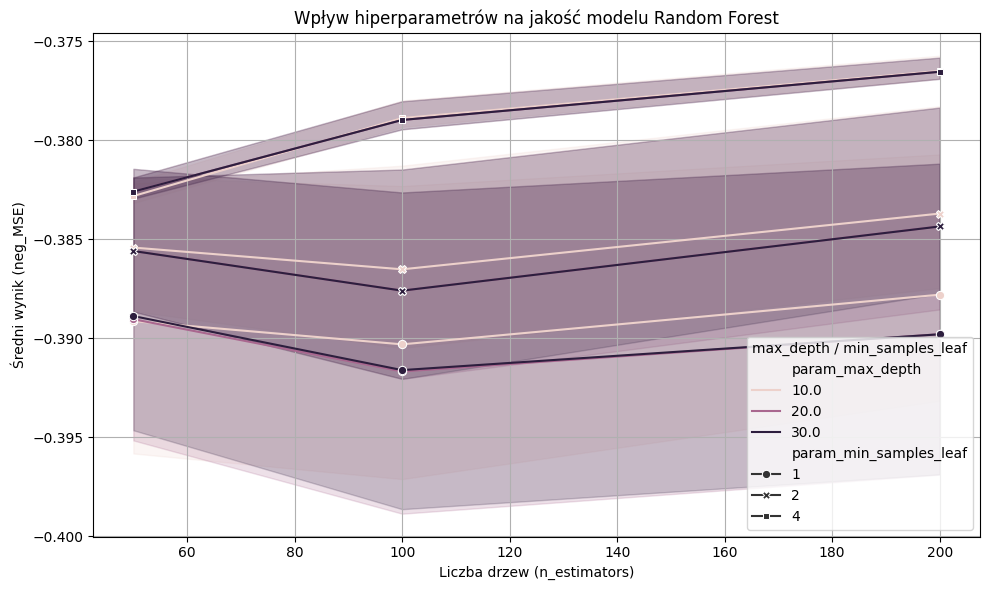

In [60]:
# Wizualizacja wpływu hiperparametrów na jakość modelu Random Forest


results = pd.DataFrame(grid_search.cv_results_)

plt.figure(figsize=(10, 6))
sns.lineplot(
    data=results,
    x='param_n_estimators',
    y='mean_test_score',
    hue='param_max_depth',
    style='param_min_samples_leaf',
    markers=True,
    dashes=False
)
plt.xlabel('Liczba drzew (n_estimators)')
plt.ylabel('Średni wynik (neg_MSE)')
plt.title('Wpływ hiperparametrów na jakość modelu Random Forest')
plt.legend(title='max_depth / min_samples_leaf')
plt.grid(True)
plt.tight_layout()
plt.show()

Wykres pokazuje wybór modelu z większą ilością drzew, z 4 min_samples i większą glębokością dawało najlepszy wynik, stosując tą samą metodologię

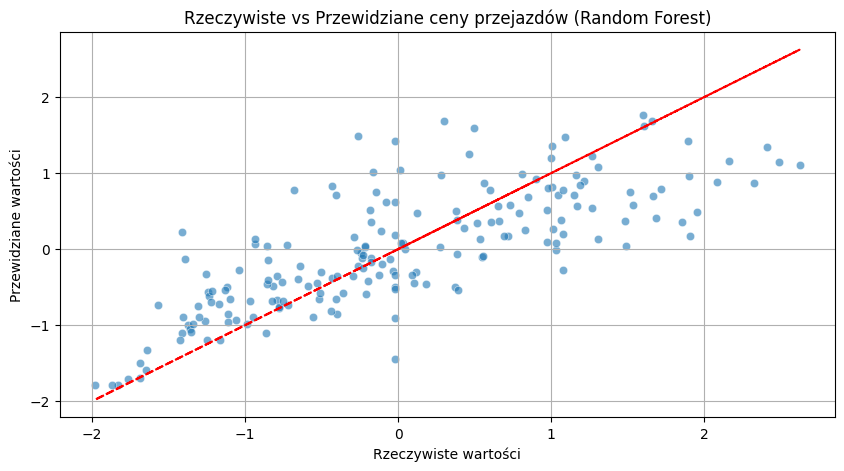

In [61]:
# Wizualizacja rzeczywistych vs przewidzianych wartości
plt.figure(figsize=(10, 5))
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.6)
plt.plot(y_test, y_test, '--r')
plt.xlabel('Rzeczywiste wartości')
plt.ylabel('Przewidziane wartości')
plt.title('Rzeczywiste vs Przewidziane ceny przejazdów (Random Forest)')
plt.grid(True)
plt.show()

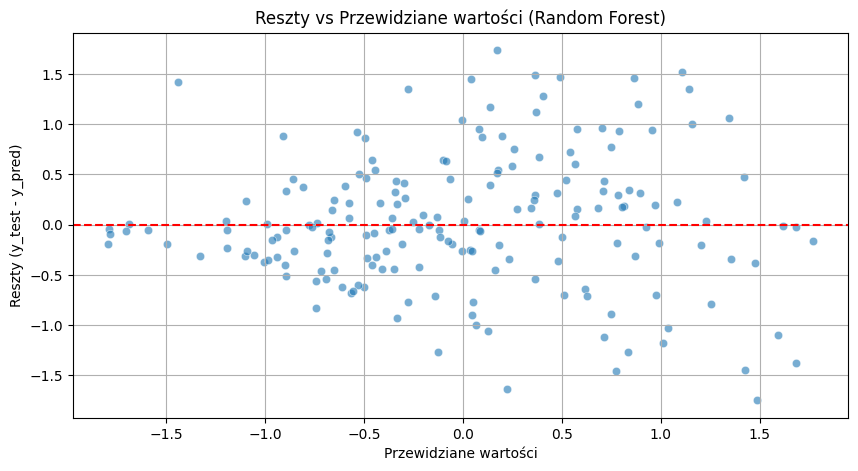

In [62]:
#Wizualizacja reszt
residuals_rf = y_test - y_pred_rf
plt.figure(figsize=(10, 5))
sns.scatterplot(x=y_pred_rf, y=residuals_rf, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Przewidziane wartości')
plt.ylabel('Reszty (y_test - y_pred)')
plt.title('Reszty vs Przewidziane wartości (Random Forest)')
plt.grid(True)
plt.show()

Z wykresów wynika, że losowy las nie jest dobrym wyborem, gdyż pomimo zachowania mniej więcej trendu, reszty są bardzo rozrzucone, co pokazuje słabą jakość modelu, pomimo doboru hiperparametrów

**Wizualizacja wskażników dla każdego modelu**

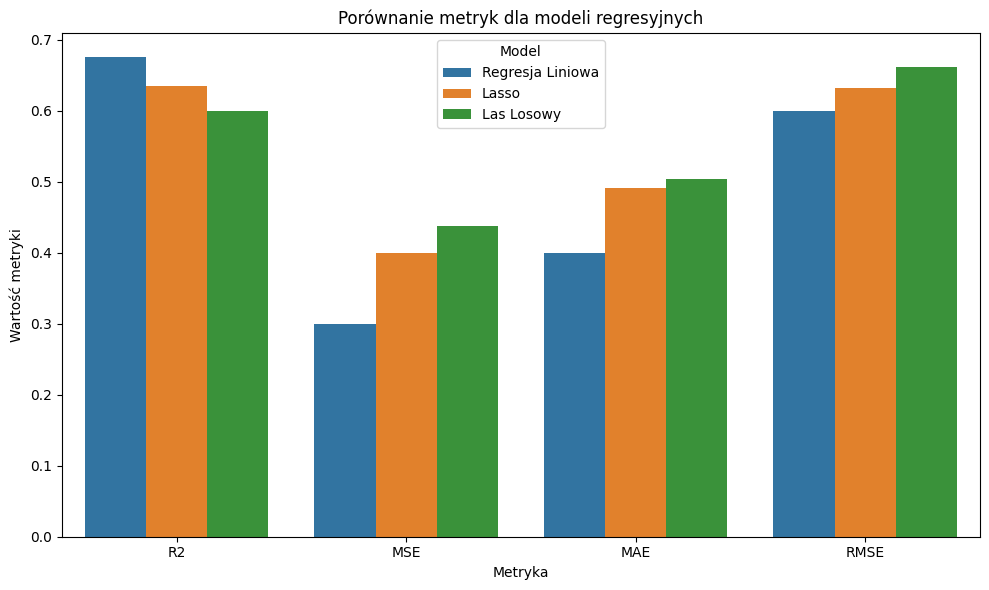

In [141]:

data = [
    {'Model': 'Regresja Liniowa', 'Metryka': 'R2', 'Wartość': r2},
    {'Model': 'Regresja Liniowa', 'Metryka': 'MSE', 'Wartość': mse},
    {'Model': 'Regresja Liniowa', 'Metryka': 'MAE', 'Wartość': mae},
    {'Model': 'Regresja Liniowa', 'Metryka': 'RMSE', 'Wartość': rmse},

    {'Model': 'Lasso', 'Metryka': 'R2', 'Wartość': r2_lasso},
    {'Model': 'Lasso', 'Metryka': 'MSE', 'Wartość': mse_lasso},
    {'Model': 'Lasso', 'Metryka': 'MAE', 'Wartość': mae_lasso},
    {'Model': 'Lasso', 'Metryka': 'RMSE', 'Wartość': rmse_lasso},

    {'Model': 'Las Losowy', 'Metryka': 'R2', 'Wartość': r2_rf},
    {'Model': 'Las Losowy', 'Metryka': 'MSE', 'Wartość': mse_rf},
    {'Model': 'Las Losowy', 'Metryka': 'MAE', 'Wartość': mae_rf},
    {'Model': 'Las Losowy', 'Metryka': 'RMSE', 'Wartość': rmse_rf},
]


df_wykres = pd.DataFrame(data)

plt.figure(figsize=(10, 6))
sns.barplot(x='Metryka', y='Wartość', hue='Model', data=df_wykres)
plt.title('Porównanie metryk dla modeli regresyjnych')
plt.ylabel('Wartość metryki')
plt.xlabel('Metryka')
plt.legend(title='Model')
plt.tight_layout()
plt.show()


In [143]:
#tabelaryczne przedstawienie wartości metryk
tabela = pd.DataFrame({
    'Model': ['Regresja Liniowa', 'Lasso', 'Las Losowy'],
    'R²': [r2, r2_lasso, r2_rf],
    'MSE': [mse, mse_lasso, mse_rf],
    'MAE': [mae, mae_lasso, mae_rf],
    'RMSE': [rmse, rmse_lasso, rmse_rf]
})

print(tabela)

              Model        R²       MSE       MAE      RMSE
0  Regresja Liniowa  0.676000  0.300000  0.400000  0.600000
1             Lasso  0.635313  0.399283  0.491381  0.631888
2        Las Losowy  0.599812  0.438151  0.503473  0.661930


# PODSUMOWANIE
- najlepszym modelem jest regresja liniowa (największa wartość współczynika determinacji i najmniejsza wartość błędów) - regresja liniowa najlepiej tłumaczy zmienność zmiennej zależnej i przewiduje nabjliżej wartości rzeczywistych
- najgorszym modelem jest las losowy, który mimno znalezienia optymalnych wartości hiperparametrów gorzej dopasował się do danych
- model Lasso jest modelem środkowym - lepszy niż las losowy ale gorszy niż model regresji liniowej


# **Więcej szczegółowych wniosków i opisów w raporcie!**